In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
# pd.options.display.float_format = '{:,.2f}'.format
# plt.rcParams['axes.formatter.useoffset'] = False

In [3]:
df = pd.DataFrame.from_csv('clean_data.csv', parse_dates=['parsed_datetime','parsed_date']) 
df.head()

/Users/chinnu/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/chinnu/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,control_area,unit,scp,station,linename,division,date,time,desc,cum_entries,cum_exits,parsed_datetime,shift_cum_entries,shift_cum_exits,shift_datetime,entries,exits,parsed_date
0,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,00:00:00,REGULAR,5704958,1934814,2016-06-18 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-18
1,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,04:00:00,REGULAR,5704958,1934829,2016-06-18 04:00:00,5704958.0,1934814.0,2016-06-18 00:00:00,0.0,15.0,2016-06-18
2,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,08:00:00,REGULAR,5704958,1934886,2016-06-18 08:00:00,5704958.0,1934829.0,2016-06-18 04:00:00,0.0,57.0,2016-06-18
3,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,12:00:00,REGULAR,5704958,1934993,2016-06-18 12:00:00,5704958.0,1934886.0,2016-06-18 08:00:00,0.0,107.0,2016-06-18
4,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,16:00:00,REGULAR,5704958,1935069,2016-06-18 16:00:00,5704958.0,1934993.0,2016-06-18 12:00:00,0.0,76.0,2016-06-18


In [4]:
#create a column extracting month and month-year
import datetime
df['month_year'] = df['parsed_date'].map(lambda x: x.strftime('%Y-%m'))
df['month'] = df['parsed_date'].map(lambda x: x.month)
df['year'] = df['parsed_date'].map(lambda x: x.year)

In [5]:
#Defining quarters of the year (from nyc.com)
def quarters(month):
    if month in [12,1,2]:
        quart = 'Winter'
    elif month in [3,4,5]:
        quart = 'Spring'
    elif month in [6,7,8]:
        quart = 'Summer'
    elif month in [9,10,11]:
        quart = 'Fall'
    else:
        quart = '-'
    return quart

df['quarters'] = df['month'].map(lambda x: quarters(x))

In [6]:
df.head()

,control_area,unit,scp,station,linename,division,date,time,desc,cum_entries,cum_exits,parsed_datetime,shift_cum_entries,shift_cum_exits,shift_datetime,entries,exits,parsed_date,month_year,month,year,quarters
0,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,00:00:00,REGULAR,5704958,1934814,2016-06-18 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-18,2016-06,6,2016,Summer
1,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,04:00:00,REGULAR,5704958,1934829,2016-06-18 04:00:00,5704958.0,1934814.0,2016-06-18 00:00:00,0.0,15.0,2016-06-18,2016-06,6,2016,Summer
2,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,08:00:00,REGULAR,5704958,1934886,2016-06-18 08:00:00,5704958.0,1934829.0,2016-06-18 04:00:00,0.0,57.0,2016-06-18,2016-06,6,2016,Summer
3,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,12:00:00,REGULAR,5704958,1934993,2016-06-18 12:00:00,5704958.0,1934886.0,2016-06-18 08:00:00,0.0,107.0,2016-06-18,2016-06,6,2016,Summer
4,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,16:00:00,REGULAR,5704958,1935069,2016-06-18 16:00:00,5704958.0,1934993.0,2016-06-18 12:00:00,0.0,76.0,2016-06-18,2016-06,6,2016,Summer


In [7]:
monthly_station_activity = df.groupby(['station','quarters','month_year'])['entries','exits'].sum().reset_index()
monthly_station_activity_max = monthly_station_activity.sort_values(['entries','exits'],ascending=[False,False])

In [8]:
#Flag check
monthly_station_activity_max.month_year[monthly_station_activity_max.quarters=='Winter'].unique()

array(['2016-12', '2017-01', '2017-02'], dtype=object)

In [9]:
quarterly_activity_yearly = df.groupby(['quarters','year'])['entries','exits'].sum().reset_index()

In [10]:
quarterly_activity_yearly.head()

,quarters,year,entries,exits
0,Fall,2016,461008007.0,348766069.0
1,Spring,2017,468182468.0,356877890.0
2,Summer,2016,358646395.0,276555797.0
3,Summer,2017,120725502.0,92785185.0
4,Winter,2016,152282754.0,115248759.0


In [11]:
quarterly_activity = df.groupby('quarters')['entries','exits'].sum().reset_index()

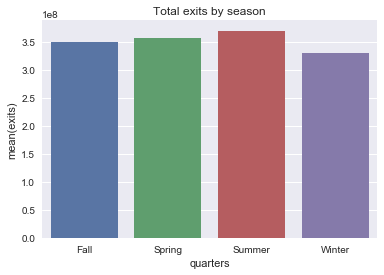

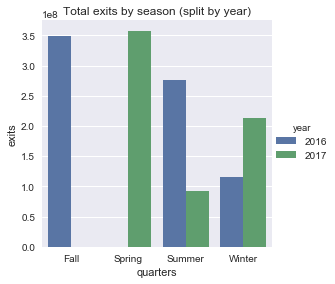

In [12]:
sns.barplot(x='quarters',y='exits',data=quarterly_activity,ci=None)
plt.title('Total exits by season')
sns.factorplot(x='quarters',y='exits',hue='year',data=quarterly_activity_yearly,kind='bar')
plt.title('Total exits by season (split by year)')

In [9]:
station_activity_quarters = df.groupby(['station','quarters','year'])['exits'].sum().reset_index()
station_activity_quarters_max = station_activity_quarters.sort_values('exits',ascending=False)

In [10]:
#The list of stations with highest activity
top_station_list = ['34 ST-PENN STA','GRD CNTRL-42 ST','34 ST-HERALD SQ','23 ST','14 ST-UNION SQ','TIMES SQ-42 ST',\
                    '86 ST','42 ST-PORT AUTH','FULTON ST','125 ST']
top_station_activity_quarters = station_activity_quarters_max[station_activity_quarters_max['station']\
                                                              .isin(top_station_list)]

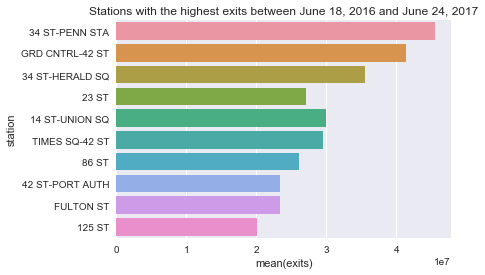

In [15]:
station_activity_overall = df.groupby('station')['exits','entries'].sum().reset_index()
station_activity_overall_max = station_activity_overall.sort_values(['entries','exits'],ascending=[False,False])
top_station_activity_overall = station_activity_overall_max[station_activity_overall_max['station']\
                                                              .isin(top_station_list)]
# plot_activity_overall = station_activity_overall_max.head(10)
sns.barplot(x='exits',y='station',data=top_station_activity_overall,ci=None)
plt.title("Stations with the highest exits between June 18, 2016 and June 24, 2017")
# sns.barplot(x='entries',y='station',data=plot_station_activity_max)
# # g1.set_xticklabels(rotation = 90)
# # g2.set_xticklabels(rotation = 90)
# plt.title("Stations with the highest entries between June 18, 2016 and June 24, 2017")

In [16]:
# sns.factorplot(x='entries',y='station',data=plot_station_activity_max,hue='quarters',kind='bar',size=6,aspect=2)
# # g1.set_xticklabels(rotation = 90)
# # g2.set_xticklabels(rotation = 90)
# plt.title("Entries of stations with the highest activity between June 18, 2016 and June 24, 2017")

In [17]:
# sns.factorplot(x='exits',y='station',data=top_station_activity_quarters,hue='quarters',kind='bar',size=6,aspect=2,ci=None)
# # g1.set_xticklabels(rotation = 90)
# # g2.set_xticklabels(rotation = 90)
# plt.title("Exits of stations with the highest activity between June 18, 2016 and June 24, 2017")

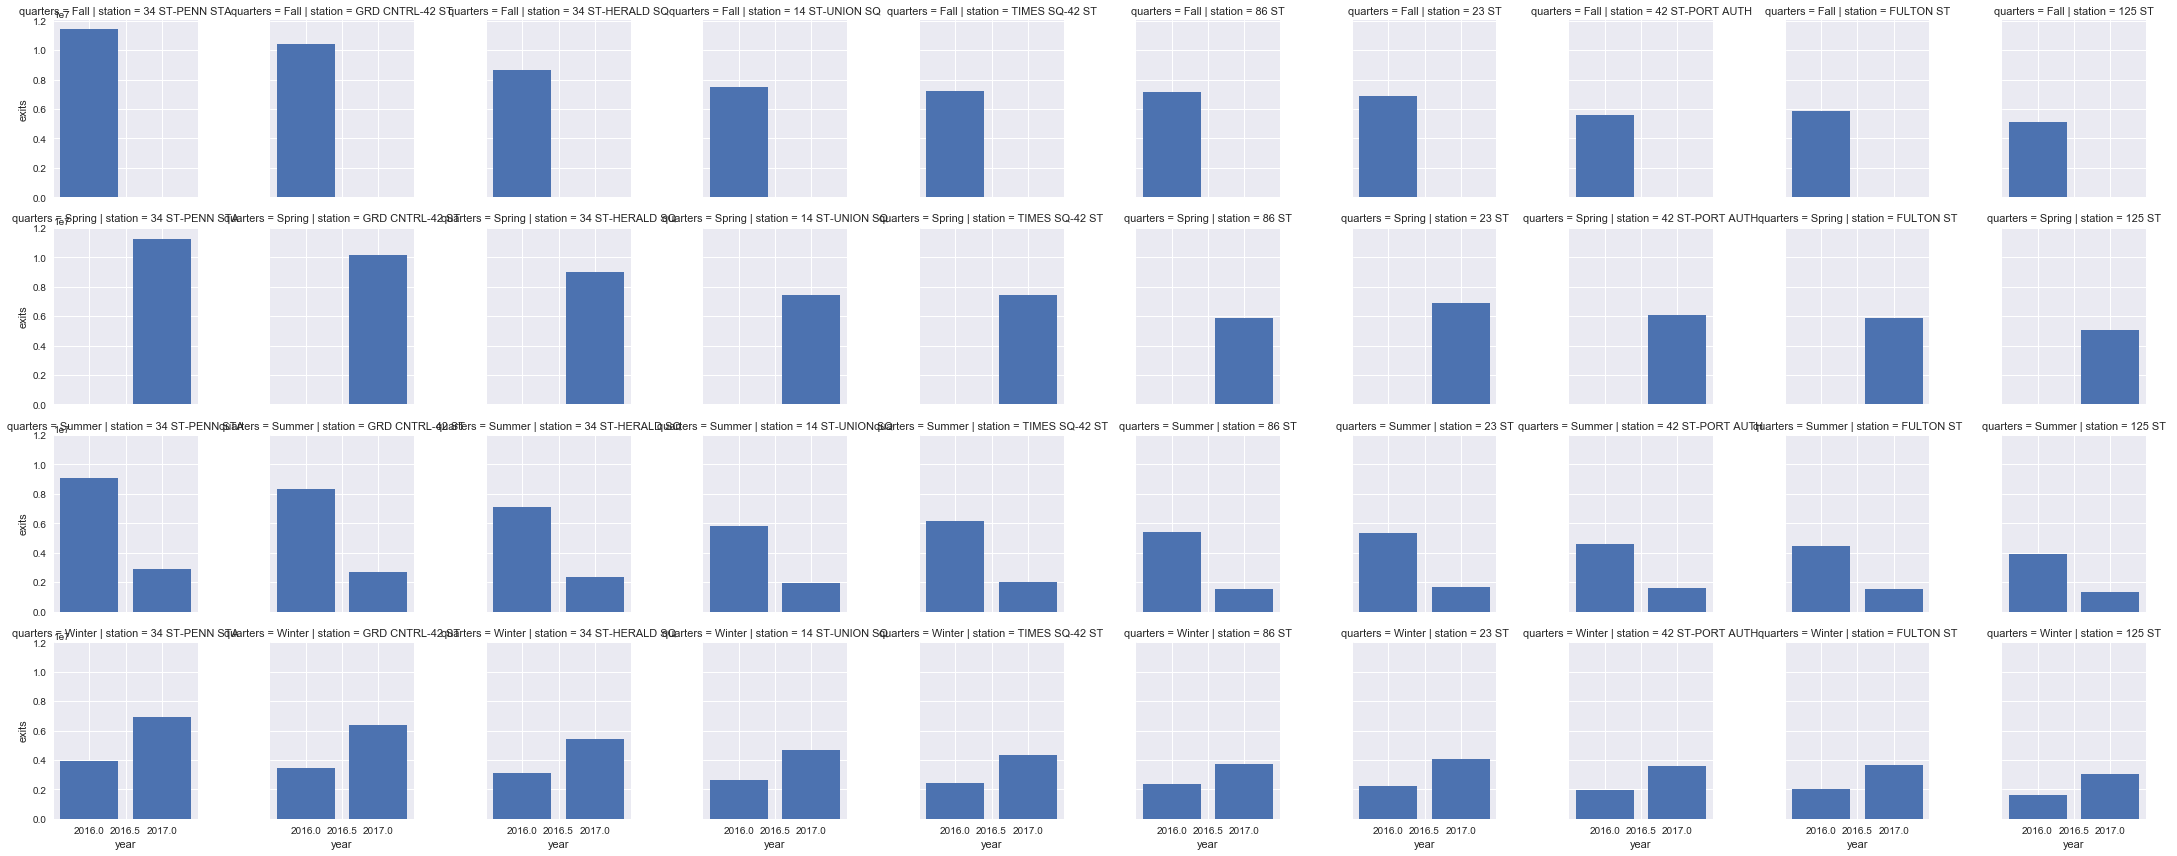

In [18]:
g = sns.FacetGrid(top_station_activity_quarters, col="station", row="quarters")
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.bar, 'year','exits').add_legend()

In [17]:
# station_exits = df.groupby('station')['exits'].sum().reset_index()

In [18]:
# station_max_exits = station_exits.sort_values('exits',ascending=False)

In [19]:
# plot_station_max_exits = station_max_exits.head(10)

In [107]:
# station_max_exits.tail(10)

In [21]:
# station_entries = df.groupby('station')['entries'].sum().reset_index()

In [22]:
# station_entries_max = station_entries.sort_values('entries',ascending=False)

In [23]:
# plot_station_max_entries = station_entries_max.head(10)

In [108]:
# station_entries_max.tail(10)

In [79]:
# g = sns.barplot(x='exits',y='station',data=plot_station_max_exits)
# # g.set_xticklabels(rotation = 0)
# plt.title("Stations with the highest number of exits between June 18, 2016 and June 24, 2017")

In [80]:
# g = sns.barplot(x='entries',y='station',data=plot_station_max_entries)
# # g.set_xticklabels(rotation = 45)
# plt.title("Stations with the highest number of entries between June 18, 2016 and June 24, 2017")

In [1]:
# station_exits_pivot = df.pivot_table(values='exits',index='station',columns='month_year')

In [2]:
# plt.figure(figsize=(20,60))
# sns.heatmap(station_exits_pivot)

In [3]:
# monthly_plot_exits = monthly_exits_station.pivot_table(values='exits',index='station',columns='quarters')

In [4]:
# plt.figure(figsize=(30,70))
# sns.heatmap(monthly_plot_exits)

In [ ]:
# top_stations_by_entries = df.sort_values('station').groupby(['quarters','month_year'])['entries','exits'].apply(lambda grp: grp.nlargest(2).sum())

In [11]:
station_activity_month = df.groupby(['station','month_year'])['exits','entries'].sum().reset_index()
#Getting the data for only the top 9 stations
top_stations_activity_month = station_activity_month[station_activity_month['station'].isin(top_station_list)]
top_station_activity_month_max = top_stations_activity_month.sort_values(['entries','exits'],ascending=[False,False])


In [98]:
# station_activity_month_max.head(140)

In [12]:
station_month_pivot = top_station_activity_month_max.pivot_table(values='exits',index='station',columns='month_year')

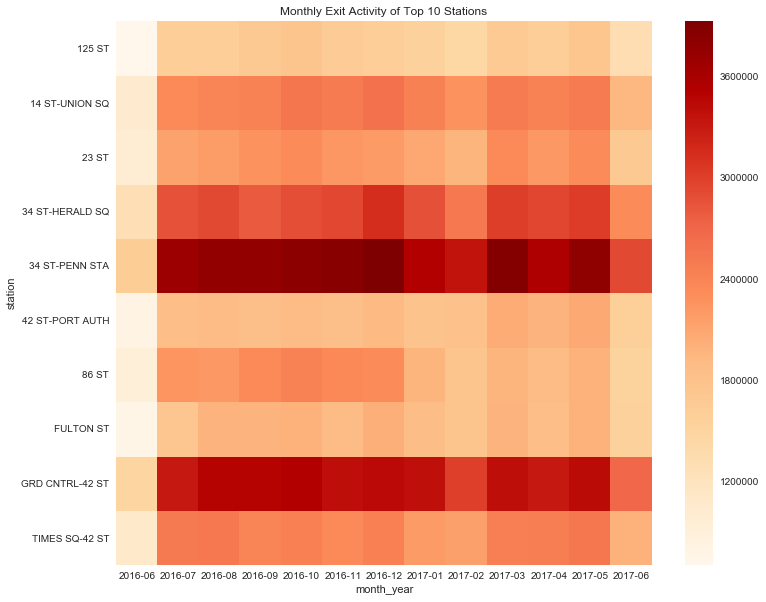

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(station_month_pivot,cmap='OrRd')
plt.title('Monthly Exit Activity of Top 10 Stations')

/Users/chinnu/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


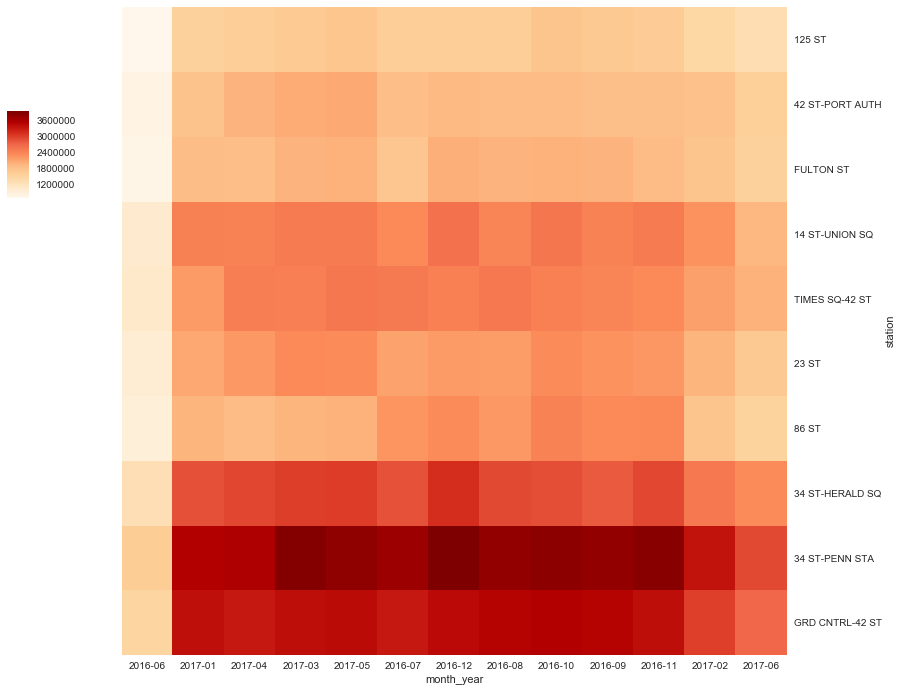

In [33]:
# station_month_pivot_clustermap = top_station_activity_month_max.pivot_table\
#                                 (values='exits',index='month_year',columns='station')
plt.figure(figsize=(15,13))
cg = sns.clustermap(station_month_pivot,cmap='OrRd')
hm = cg.ax_heatmap.get_position()
cg.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*1.5, hm.height*1.5])
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.setp(cg.ax_heatmap.get_yticklabels(), rotation=0);
plt.setp(cg.ax_heatmap.get_xticklabels(), rotation=0);


In [38]:
#Looking at weekend data
df['weekday'] = df['parsed_date'].map(lambda x: x.weekday())

In [23]:
df.head()

,control_area,unit,scp,station,linename,division,date,time,desc,cum_entries,cum_exits,parsed_datetime,shift_cum_entries,shift_cum_exits,shift_datetime,entries,exits,parsed_date,month_year,month,year,quarters,weekday
0,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,00:00:00,REGULAR,5704958,1934814,2016-06-18 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-18,2016-06,6,2016,Summer,5
1,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,04:00:00,REGULAR,5704958,1934829,2016-06-18 04:00:00,5704958.0,1934814.0,2016-06-18 00:00:00,0.0,15.0,2016-06-18,2016-06,6,2016,Summer,5
2,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,08:00:00,REGULAR,5704958,1934886,2016-06-18 08:00:00,5704958.0,1934829.0,2016-06-18 04:00:00,0.0,57.0,2016-06-18,2016-06,6,2016,Summer,5
3,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,12:00:00,REGULAR,5704958,1934993,2016-06-18 12:00:00,5704958.0,1934886.0,2016-06-18 08:00:00,0.0,107.0,2016-06-18,2016-06,6,2016,Summer,5
4,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,16:00:00,REGULAR,5704958,1935069,2016-06-18 16:00:00,5704958.0,1934993.0,2016-06-18 12:00:00,0.0,76.0,2016-06-18,2016-06,6,2016,Summer,5


In [39]:
weekend = [5,6]
df['weekend_flag'] = df['weekday'].map(lambda x: 'weekend' if x in weekend else 'weekday')

In [40]:
#sanity check
df.groupby(['weekday','weekend_flag'])['exits'].sum().reset_index()

,weekday,weekend_flag,exits
0,0,weekday,208961756.0
1,1,weekday,229644872.0
2,2,weekday,237710764.0
3,3,weekday,234955641.0
4,4,weekday,231650765.0
5,5,weekend,144002782.0
6,6,weekend,117152139.0


In [41]:
weekend_data = df[df['weekend_flag']=='weekend']
weekend_station_activity = weekend_data.groupby(['station','quarters','weekend_flag','year'])['exits','entries'].sum().reset_index()

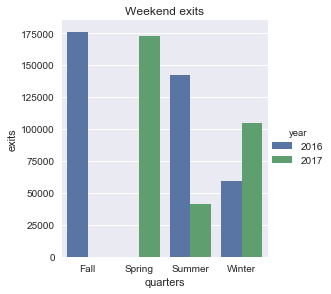

In [42]:

sns.factorplot(x='quarters',y='exits',hue='year',data=weekend_station_activity,ci=None,kind='bar')
plt.title('Weekend exits')

# sns.factorplot(x='quarters',y='entries',hue='year',data=weekend_station_activity,ci=None,kind='bar')
# plt.title('Weekend entries')

In [28]:
top_station_weekend_activity = weekend_station_activity[weekend_station_activity['station'].isin(top_station_list)]

In [29]:
top_weekend_station_activity_max = top_station_weekend_activity.sort_values(['entries','exits'],ascending=[False,False])

In [30]:
top_weekend_station_activity_max.head(5)

,station,quarters,weekend_flag,year,exits,entries
366,34 ST-PENN STA,Fall,weekend,2016,1983939.0,2225115.0
367,34 ST-PENN STA,Spring,weekend,2017,2006469.0,2184564.0
84,14 ST-UNION SQ,Fall,weekend,2016,1616631.0,1863127.0
85,14 ST-UNION SQ,Spring,weekend,2017,1510595.0,1799185.0
368,34 ST-PENN STA,Summer,weekend,2016,1567763.0,1763768.0


In [82]:
# sns.factorplot(x='entries',y='station',data=top_weekend_station_activity_max,hue='quarters',kind='bar',size=6,aspect=2)
# # g1.set_xticklabels(rotation = 90)
# # g2.set_xticklabels(rotation = 90)
# plt.title("Weekend entries of stations with the highest activity between June 18, 2016 and June 24, 2017")

In [83]:
# sns.factorplot(x='exits',y='station',data=top_weekend_station_activity_max,hue='quarters',kind='bar',size=6,aspect=2)
# # g1.set_xticklabels(rotation = 90)
# # g2.set_xticklabels(rotation = 90)
# plt.title("Weekend exits of stations with the highest activity between June 18, 2016 and June 24, 2017")

In [71]:
#Observing weekend exit activity
weekend_station_activity_month = weekend_data.groupby(['month_year','weekend_flag'])\
                                    ['exits','entries'].sum().reset_index()

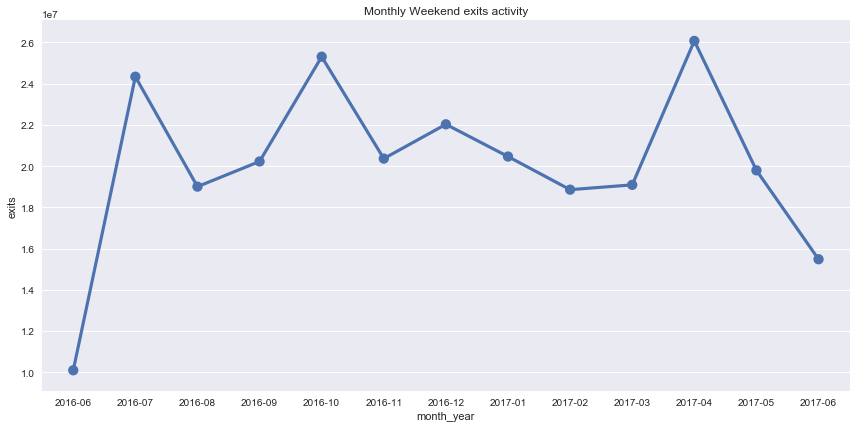

In [72]:
sns.factorplot(x='month_year',y='exits',data=weekend_station_activity_month,size=6,aspect=2,ci=None)
plt.title('Monthly Weekend exits activity')

In [47]:
location_data = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv')

In [35]:
location_data.head()

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Route_7,Route_8,Route_9,Route_10,Route_11,Entrance_Type,Entry,Exit_Only,Vending,Staffing,Staff_Hours,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Latitude,Longitude
0,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.775149,-73.912074
1,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.774810,-73.912151
2,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.775025,-73.911891
3,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.774938,-73.912337
4,BMT,Astoria,Astoria Blvd-Hoyt Av,40.770258,-73.917843,N,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,31st St,Hoyt Ave South,SW,40.770313,-73.917978
